# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [1]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Load the data
Req_data = pd.read_csv('product_reviews.csv')

In [3]:
# Load train-test split indices
with open('train_test_index.pickle', 'rb') as handle:
    index = pickle.load(handle)

In [ ]:
# Print the keys to identify the correct ones
print(index.keys())

dict_keys(['train_index', 'test_index'])


In [4]:
# Extract training and testing data
trainData = Req_data.iloc[index['train_index']]
testData = Req_data.iloc[index['test_index']]

In [5]:
# Preprocess the text
def preprocessing(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [6]:
# Check the column names in the dataset
print(Req_data.columns)

Index(['text', 'stars', 'sentiment'], dtype='object')


In [7]:
# Apply preprocessing to both training and testing data
trainData['clean_text'] = trainData['text'].apply(preprocessing)
testData['clean_text'] = testData['text'].apply(preprocessing)

# Drop rows with NaN values, if any, after preprocessing
train_data = trainData.dropna(subset=['clean_text'])
test_data = testData.dropna(subset=['clean_text'])

<ipython-input-7-4697c98d4799>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['clean_text'] = trainData['text'].apply(preprocessing)
<ipython-input-7-4697c98d4799>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['clean_text'] = testData['text'].apply(preprocessing)


In [8]:
# Create Bag of Words (BoW) features using CountVectorizer
vectorizer = CountVectorizer()
Xtrain = vectorizer.fit_transform(train_data['clean_text'])
Xtest = vectorizer.transform(test_data['clean_text'])

In [9]:
# Define the target variable
ytrain = trainData['stars']
ytest = testData['stars']

In [10]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(Xtrain, ytrain)

MultinomialNB()

In [11]:
# Make predictions on the test set
y_pred = model.predict(Xtest)

# Evaluate the performance
report = classification_report(ytest, y_pred)
print(report)

              precision    recall  f1-score   support

         1.0       0.73      0.75      0.74      1149
         2.0       0.46      0.09      0.15       587
         4.0       0.48      0.49      0.49      1981
         5.0       0.79      0.84      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.61      0.55      0.55      8799
weighted avg       0.69      0.70      0.69      8799



### Repeat task 2 with Tf-Idf features

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# Create TfIdf features using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['clean_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['clean_text'])

In [14]:
# Train a Naive Bayes classifier on TfIdf features
model_tfidf = ComplementNB()
model_tfidf.fit(X_train_tfidf, ytrain)

ComplementNB()

In [15]:
# Make predictions on the test set using TfIdf features
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

In [16]:
# Evaluate the performance with TfIdf features
report_tfidf = classification_report(ytest, y_pred_tfidf)
print("Classification Report for TfIdf Features:\n", report_tfidf)

Classification Report for TfIdf Features:
               precision    recall  f1-score   support

         1.0       0.68      0.76      0.72      1149
         2.0       0.52      0.07      0.13       587
         4.0       0.51      0.20      0.29      1981
         5.0       0.72      0.94      0.82      5082

    accuracy                           0.69      8799
   macro avg       0.61      0.49      0.49      8799
weighted avg       0.65      0.69      0.64      8799



### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [17]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score, adjusted_rand_score

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


In [18]:
# Function to plot the elbow curve
def graph(data, max_clusters=10):
    wcss = []  # Within-Cluster Sum of Squares

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()

In [19]:
# Function to perform k-means clustering and evaluate metrics
def kmeans_clustering(data, n_clusters, init_method='k-means++'):
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

In [20]:
# Evaluate clustering metrics
def evaluate_values(true_labels, pred_labels):
    # Purity
    contingency_matrix = confusion_matrix(true_labels, pred_labels)
    purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

    # Normalized Mutual Information (NMI)
    nmi = normalized_mutual_info_score(true_labels, pred_labels)

    # Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(true_labels, pred_labels)

    return purity, nmi, ari

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

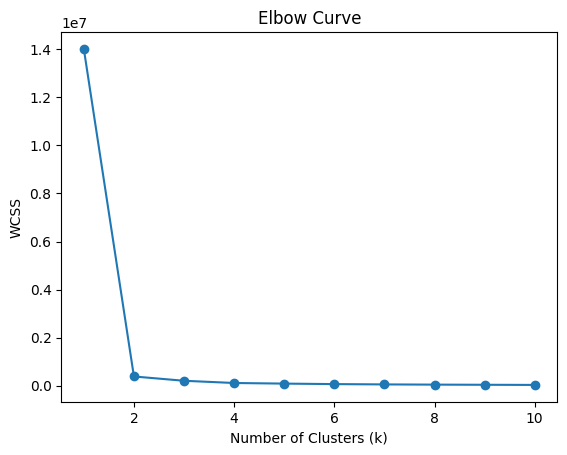

In [21]:
# Task 1: Plot the elbow curve
graph(embeds, max_clusters=10)

In [22]:
# Task 2: Perform k-means clustering with different initialization methods
clusters_num = 4  # You can choose the number of clusters based on the elbow curve
labels_kmeans_pp = kmeans_clustering(embeds, clusters_num, init_method='k-means++')
labels_kmeans_random = kmeans_clustering(embeds, clusters_num, init_method='random')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Task 3: Evaluate clustering metrics
# Assuming you have the true labels (star ratings) from Part 1
true_labels = Req_data['stars']  # Adjust this based on your dataset

In [24]:
# Evaluate metrics for k-means++
purity_kmeans_pp, nmi_kmeans_pp, ari_kmeans_pp = evaluate_values(true_labels, labels_kmeans_pp)
print("Metrics for k-means++:")
print("Purity:", purity_kmeans_pp)
print("NMI:", nmi_kmeans_pp)
print("ARI:", ari_kmeans_pp)

Metrics for k-means++:
Purity: 0.7132140579873223
NMI: 0.5200273108478978
ARI: 0.48153049461960046


In [25]:
# Evaluate metrics for random initialization
purity_kmeans_random, nmi_kmeans_random, ari_kmeans_random = evaluate_values(true_labels, labels_kmeans_random)
print("\nMetrics for random initialization:")
print("Purity:", purity_kmeans_random)
print("NMI:", nmi_kmeans_random)
print("ARI:", ari_kmeans_random)


Metrics for random initialization:
Purity: 0.7132140579873223
NMI: 0.5200273108478978
ARI: 0.48153049461960046
